In [1]:
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2, ResNet50
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
model_0 = ResNet50V2(include_top=False,
                     weights='imagenet',
                     input_shape=(640, 640, 3))

In [20]:
conv2_out = model_0.get_layer('conv3_block1_preact_relu').output
conv3_out = model_0.get_layer('conv4_block1_preact_relu').output
conv4_out = model_0.get_layer('conv5_block1_preact_relu').output
conv5_out = model_0.get_layer('post_relu').output
fea_model = keras.Model(inputs=[model_0.input], outputs=[conv2_out, conv3_out, conv4_out, conv5_out])

In [ ]:

def cope_out(out_img, name_):
    out_img = keras.backend.squeeze(out_img, 0)
    out_img = np.sum(out_img, axis=-1)
    out_img = keras.backend.expand_dims(out_img, 2)
    out_img = out_img / np.max(out_img) * 255
    out_img = np.rint(out_img)
    plt.imsave(name_, out_img, cmap='gray')

In [23]:
path = './VOC2007-640'
def save_fea_map(path_):
    conv2_path = os.path.join(path_, 'conv2')
    conv3_path = os.path.join(path_, 'conv3')
    conv4_path = os.path.join(path_, 'conv4')
    conv5_path = os.path.join(path_, 'conv5')
    ori_path = os.path.join(path_, 'img_dete')
    files = os.listdir(ori_path)
    for img in files:
        img_path = os.path.join(ori_path, img)
        img = keras.preprocessing.image.load_img(img_path, target_size=(640, 640, 3))
        img = keras.preprocessing.image.img_to_array(img)
        img = keras.backend.expand_dims(img, axis=0)
        out = fea_model(img)
        cope_out(out[0], os.path.join(conv2_path, img))
        cope_out(out[1], os.path.join(conv3_path, img))
        cope_out(out[2], os.path.join(conv4_path, img))
        cope_out(out[3], os.path.join(conv5_path, img))
save_fea_map(path)

AttributeError: 'list' object has no attribute 'shape'

(20, 20, 1)


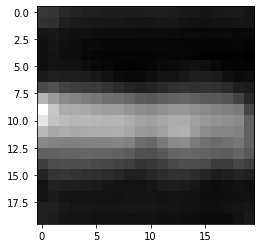